In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

uber = pd.read_csv('Uber Request Data.csv',encoding = "ISO-8859-1")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [2]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [3]:
uber = uber.drop(['Driver id'], axis = 1)
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
#How many unique pickup points are present in uber?
print(uber['Pickup point'].unique())

['Airport' 'City']


# Requests status

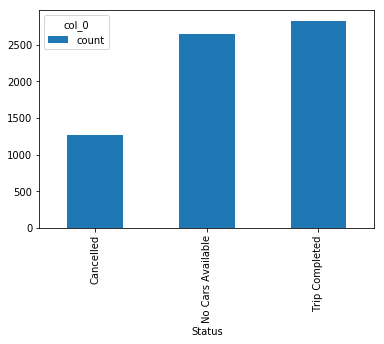

In [5]:
status = pd.crosstab(index = uber["Status"], columns="count")     
status.plot.bar()

There are more "No cars available" than "Number of trips" cancelled.

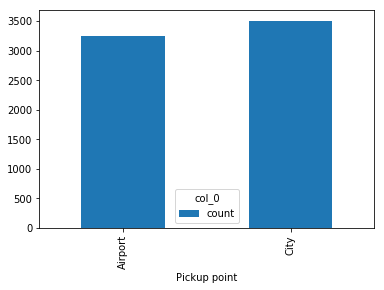

In [6]:
pick_point = pd.crosstab(index = uber["Pickup point"], columns="count")     
pick_point.plot.bar()

Both Airport and City pickup points have approximately equal datapoints in a given dataset

In [7]:
#grouping by Status and Pickup point.
uber.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

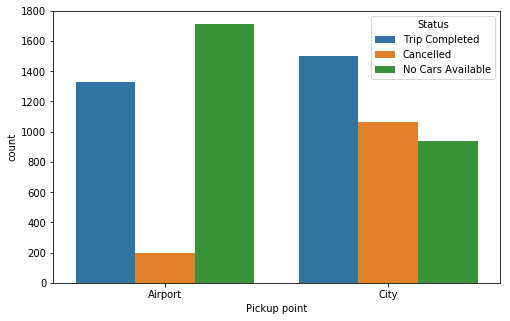

In [22]:
# Visualizing the count of Status and Pickup points
plt.figure(figsize=(8,5))
sns.countplot(x=uber['Pickup point'],hue =uber['Status'] ,data = uber)

As seen in above visualization, there is higher incidence of No cars available status from Airport to City whereas there is
higher incidence of Cancelled status from City to Airport.

# Timeslots

In [9]:
#Request hours
uber['Request Hour'] = uber['Request timestamp'].dt.hour

In [10]:
uber.loc[uber['Request Hour'].between(1,11, inclusive=True),'Request Time Slot'] = 'Morning'
uber.loc[uber['Request Hour'].between(12,16, inclusive=True),'Request Time Slot'] = 'Noon'
uber.loc[uber['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uber.loc[uber['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [11]:
#As Demand include trips completed, cancelled and no cars available, we will create a column with value 1
uber['Demand'] = 1
#As Supply can only contain trips completed, so we will create a column with 1 for trips completed and 0 otherwise.
uber['Supply'] = 0
uber.loc[(uber['Status'] == 'Trip Completed'),'Supply'] = 1

# Gap between supply and demand

In [12]:
uber['Gap'] = uber['Demand'] - uber['Supply']
uber.loc[uber['Gap']==0,'Gap'] = 'Trip Completed'
uber.loc[uber['Gap']==1,'Gap'] = 'Trip Not Completed'

In [13]:
uber = uber.drop(['Request Hour', 'Demand', 'Supply'], axis=1)
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


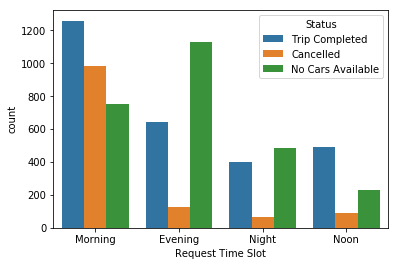

In [14]:
sns.countplot(x=uber['Request Time Slot'],hue =uber['Status'] ,data = uber)

From the above plot it is visible that there are "Higher incidences of No cars available in the evening" 
and "Higher incidences of Cancelled trips in the morning "

# Find the time slots when the highest gap exists

<Figure size 720x720 with 0 Axes>

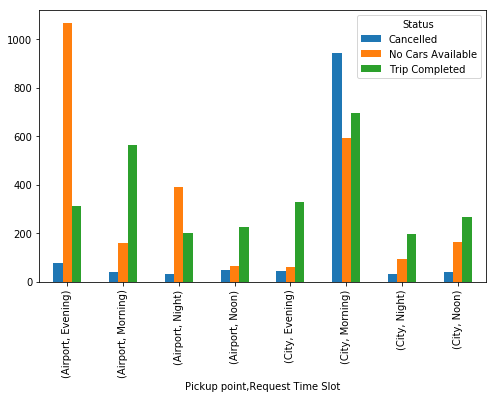

In [20]:
plt.figure(figsize=(10,10))
pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar(figsize=(8,5))

As seen in visualization above,there are higher incidences of "No cars available" from Airport to City in the evenings while 
there are incidences of "Trips cancelled" from City to Airport in the mornings

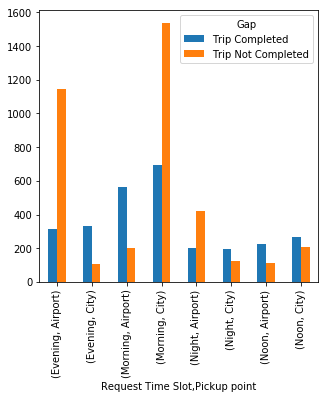

In [18]:
gap_main_df = pd.DataFrame(uber.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar(figsize=(5,5))

As visible from above visualization, Most trips are cancelled in the Morning with Pickup Point from "CITY" to "AIRPORT".
Similarly, Most trips are cancelled in the Evening with Pickup Point from "AIRPORT" to "CITY"

# Suggestions

For bridging the demand supply gap from Airport to City in Evenings, extra commissions can be offered to the drivers.
Similarly from City to Airport,extra commissions can be offered to the drivers.